# Homework 5: Pivot Tables and Iteration

**Reading**: 
* [Cross-Classifying by more than one variable](https://www.inferentialthinking.com/chapters/08/3/cross-classifying-by-more-than-one-variable.html) 
* [Bike Sharing](https://www.inferentialthinking.com/chapters/08/5/bike-sharing-in-the-bay-area.html) 
* [Randomness](https://www.inferentialthinking.com/chapters/09/randomness.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 5 is due Wednesday, 10/09 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw05.ok')
_ = ok.auth(inline=True)

Assignment: Homework 5: Pivot Tables and Iteration
OK, version v1.14.15

Successfully logged in as rga2uz@virginia.edu


## 1. Causes of Death by Year


This exercise is designed to give you practice using the Table method `pivot`. [Here](http://data8.org/fa18/python-reference.html) is a link to the Python reference page in case you need a quick refresher.

We'll be looking at a [dataset](http://www.healthdata.gov/dataset/leading-causes-death-zip-code-1999-2013) from the California Department of Public Health that records the cause of death, as recorded on a death certificate, for everyone who died in California from 1999 to 2013.  The data is in the file `causes_of_death.csv.zip`. Each row records the number of deaths by a specific cause in one year in one ZIP code.

To make the file smaller, we've compressed it; run the next cell to unzip and load it. The first line is not a Python statement. Anything appearing after `!` on a line will be executed not by the Python kernel, but by the system command-line.

If you have a Windows machine, the first line might not work. If that's the case, you'll need to comment it out, and unzip the file manually, giving it the name `causes_of_death.csv`. 

In [3]:
!unzip -o causes_of_death.csv.zip
causes = Table.read_table('causes_of_death.csv')
causes

Archive:  causes_of_death.csv.zip
  inflating: causes_of_death.csv     


Year,ZIP Code,Cause of Death,Count,Location
1999,90002,SUI,1,"(33.94969, -118.246213)"
1999,90005,HOM,1,"(34.058508, -118.301197)"
1999,90006,ALZ,1,"(34.049323, -118.291687)"
1999,90007,ALZ,1,"(34.029442, -118.287095)"
1999,90009,DIA,1,"(33.9452, -118.3832)"
1999,90009,LIV,1,"(33.9452, -118.3832)"
1999,90009,OTH,1,"(33.9452, -118.3832)"
1999,90010,STK,1,"(34.060633, -118.302664)"
1999,90010,CLD,1,"(34.060633, -118.302664)"
1999,90010,DIA,1,"(34.060633, -118.302664)"


The causes of death in the data are abbreviated.  We've provided a table called `abbreviations.csv` to translate the abbreviations.

In [4]:
abbreviations = Table.read_table('abbreviations.csv')
abbreviations.show()

Cause of Death,Cause of Death (Full Description)
AID,Acquired Immune Deficiency Syndrome (AIDS)
ALZ,Alzheimer's Disease
CAN,Malignant Neoplasms (Cancers)
CLD,Chronic Lower Respiratory Disease (CLRD)
CPD,Chronic Obstructive Pulmonary Disease (COPD)
DIA,Diabetes Mellitus
HIV,Human Immunodeficiency Virus Disease (HIVD)
HOM,Homicide
HTD,Diseases of the Heart
HYP,Essential Hypertension and Hypertensive Renal Disease


The dataset is missing data on certain causes of death for certain years.  It looks like those causes of death are relatively rare, so for some purposes it makes sense to drop them from consideration.  Of course, we'll have to keep in mind that we're no longer looking at a comprehensive report on all deaths in California.

**Question 1.** Let's clean up our data. First, filter out the HOM, HYP, and NEP rows from the table for the reasons described above. Next, join together the abbreviations table and our causes of death table so that we have a more detailed description of each disease in each row. Lastly, drop the column which contains the acronym of the disease, and rename the column with the full description 'Cause of Death'. Assign the variable `cleaned_causes` to the resulting table. 

*Hint:* You should expect this to take more than one line. Use many lines and many intermediate tables to complete this question. 

In [5]:
# filtering out HOM, HYP, and NEP rows from causes table; assigning cleaned table to cleaned_causes 
cleaned_causes = causes.where("Cause of Death", are.not_equal_to("HOM")).where("Cause of Death", are.not_equal_to("HYP")).where("Cause of Death", are.not_equal_to("NEP"))

# joining cleand_causes table and abbreviations table; dropping acronym; renaming; reassigning to cleaned_causes
cleaned_causes = cleaned_causes.join("Cause of Death", abbreviations, "Cause of Death").drop(0).relabeled(4, "Cause of Death")
cleaned_causes

Year,ZIP Code,Count,Location,Cause of Death
1999,90006,1,"(34.049323, -118.291687)",Alzheimer's Disease
1999,90007,1,"(34.029442, -118.287095)",Alzheimer's Disease
1999,90012,1,"(34.061396, -118.238479)",Alzheimer's Disease
1999,90015,1,"(34.043439, -118.271613)",Alzheimer's Disease
1999,90017,1,"(34.055864, -118.266582)",Alzheimer's Disease
1999,90020,1,"(34.066535, -118.302211)",Alzheimer's Disease
1999,90031,1,"(34.078349, -118.211279)",Alzheimer's Disease
1999,90033,1,"(34.048676, -118.208442)",Alzheimer's Disease
1999,90042,1,"(34.114527, -118.192902)",Alzheimer's Disease
1999,90044,1,"(33.955089, -118.290119)",Alzheimer's Disease


In [6]:
answer_cleaned_causes = cleaned_causes.copy()
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



We're going to examine the changes in causes of death over time.  To make a plot of those numbers, we need to have a table with one row per year, and the information about all the causes of death for each year.

**Question 2.** Create a table with one row for each year and a column for each kind of death, where each cell contains the number of deaths by that cause in that year. Call the table `cleaned_causes_by_year`.

In [7]:
cleaned_causes_by_year = cleaned_causes.pivot("Cause of Death", "Year", "Count", sum)
cleaned_causes_by_year.show(15)

Year,All Other Causes,Alzheimer's Disease,Cerebrovascular Disease (Stroke),Chronic Liver Disease and Cirrhosis,Chronic Lower Respiratory Disease (CLRD),Diabetes Mellitus,Diseases of the Heart,Intentional Self Harm (Suicide),Malignant Neoplasms (Cancers),Pneumonia and Influenza,Unintentional Injuries
1999,38392,3934,18079,3546,13187,6004,69900,3047,52880,8014,8940
2000,39259,4398,18090,3673,12754,6203,68533,3113,53005,8355,8814
2001,38383,4897,18078,3759,13056,6457,69004,3256,53810,8167,9274
2002,41177,5405,17551,3725,12643,6783,68387,3210,53926,8098,9882
2003,40325,6585,17686,3832,13380,7088,69013,3396,54307,8184,10470
2004,39926,6962,16884,3686,12519,7119,65002,3364,53708,7331,10614
2005,41791,7694,15550,3819,13166,7679,64684,3188,54606,7537,10924
2006,42965,8141,15011,3826,12807,7367,64648,3296,54043,7329,11236
2007,43130,8495,13724,4052,12497,7395,62220,3543,54918,6522,11426
2008,42800,10095,13792,4142,13346,7349,60739,3729,54579,6576,10667


In [8]:
answer_cleaned_causes_by_year = cleaned_causes_by_year.copy()
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Make a plot of all the causes of death by year, using your cleaned-up version of the dataset.  There should be a single plot with one line per cause of death.

*Hint:* Use the Table method `plot`.  If you pass only a single argument, a line will be made for each of the other columns.

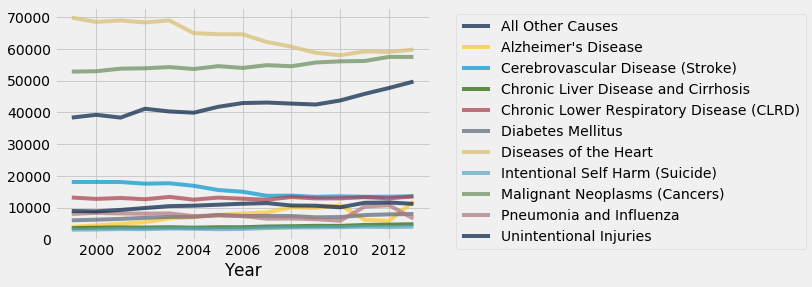

In [9]:
cleaned_causes_by_year.plot("Year")

After seeing the plot above, we would now like to examine the distributions of diseases over the years using percentages. Below, we have assigned `distributions` to a table with all of the same columns, but the raw counts in the cells are replaced by the percentage of the the total number of deaths by a particular disease that happened in that specific year. 

Try to understand the code below. 

In [10]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

labels = cleaned_causes_by_year.labels
distributions = Table().with_columns(labels[0], cleaned_causes_by_year.column(0),
                                     labels[1], percents(cleaned_causes_by_year.column(1)),
                                     labels[2], percents(cleaned_causes_by_year.column(2)),
                                     labels[3], percents(cleaned_causes_by_year.column(3)),
                                     labels[4], percents(cleaned_causes_by_year.column(4)),
                                     labels[5], percents(cleaned_causes_by_year.column(5)),
                                     labels[6], percents(cleaned_causes_by_year.column(6)),
                                     labels[7], percents(cleaned_causes_by_year.column(7)),
                                     labels[8], percents(cleaned_causes_by_year.column(8)),
                                     labels[9], percents(cleaned_causes_by_year.column(9)),
                                     labels[10], percents(cleaned_causes_by_year.column(10)),
                                     labels[11], percents(cleaned_causes_by_year.column(11)))
distributions.show()


Year,All Other Causes,Alzheimer's Disease,Cerebrovascular Disease (Stroke),Chronic Liver Disease and Cirrhosis,Chronic Lower Respiratory Disease (CLRD),Diabetes Mellitus,Diseases of the Heart,Intentional Self Harm (Suicide),Malignant Neoplasms (Cancers),Pneumonia and Influenza,Unintentional Injuries
1999,6.02,3.54,7.8,5.86,6.76,5.61,7.3,5.8,6.43,6.91,5.68
2000,6.16,3.96,7.8,6.07,6.54,5.8,7.16,5.92,6.44,7.21,5.6
2001,6.02,4.4,7.8,6.21,6.7,6.04,7.21,6.19,6.54,7.05,5.9
2002,6.46,4.86,7.57,6.15,6.48,6.34,7.15,6.11,6.55,6.99,6.28
2003,6.32,5.92,7.63,6.33,6.86,6.63,7.21,6.46,6.6,7.06,6.66
2004,6.26,6.26,7.28,6.09,6.42,6.66,6.79,6.4,6.53,6.32,6.75
2005,6.55,6.92,6.71,6.31,6.75,7.18,6.76,6.06,6.64,6.5,6.94
2006,6.74,7.32,6.47,6.32,6.57,6.89,6.75,6.27,6.57,6.32,7.14
2007,6.76,7.64,5.92,6.69,6.41,6.91,6.5,6.74,6.67,5.63,7.26
2008,6.71,9.08,5.95,6.84,6.85,6.87,6.35,7.09,6.63,5.67,6.78


**Question 4.** What is the sum (roughly) of each of the columns (except the Year column) in the table above? Why does this make sense? 

The sum of each of the disease column in the table above is roughly 100, which is to be expected. The code above generates a new table with rows corresponding to the percentage of the total number of deaths by a particular disease that happened that year. The percents function takes the sum of an array that is the number of deaths by a particular disease each year, and then returns a new array that is the result of dividing each element in the original array by the sum. Each column should sum to almost exactly 100% because you are adding all of the individual percents of the number of deaths that ocurred by that disease in that year. It won't be exactly 100% because the percents function rounds the elements in the array it returns to 2 decimal places.

**Question 5:** We suspect that the larger percentage of stroke-related deaths over the years 1999-2013 happened in the earlier years, while the larger percentage of deaths related to Chronic Liver Disease over this time period occured in the most recent years. Draw a bar chart to display both of the distributions of these diseases over the time period. 

*Hint:* The relevant column labels are "Cerebrovascular Disease (Stroke)" and "Chronic Liver Disease and Cirrhosis"

Text(0.5, 0, '% of total deaths')

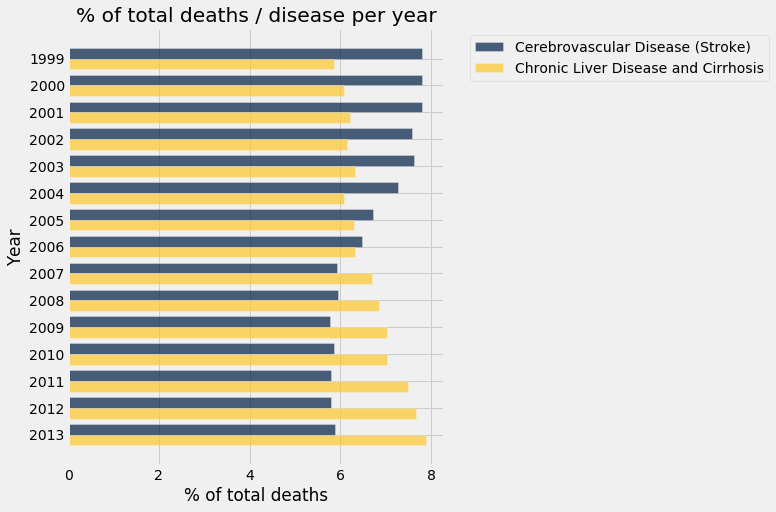

In [11]:
distributions.select("Year","Cerebrovascular Disease (Stroke)", "Chronic Liver Disease and Cirrhosis").barh("Year")

# Don't change the code below this comment.
plt.title("% of total deaths / disease per year")
plt.xlabel("% of total deaths")


## Unrolling Loops

"Unrolling" a `for` loop means to manually write out all the code that it executes.  The result is code that does the same thing as the loop, but without the structure of the loop.  For example, for the following loop:

    for num in np.arange(3):
        print("The number is", num)

The unrolled version would look like this:

    print("The number is", 0)
    print("The number is", 1)
    print("The number is", 2)


Unrolling a `for` loop is a great way to understand what the loop is doing during each step. In this exercise, you'll practice unrolling `for` loops.


In each question below, write code that does the same thing as the given code, but with any `for` loops unrolled.  It's a good idea to run both your answer and the original code to verify that they do the same thing.  (Of course, if the code does something random, you'll get a different random outcome than the original code!)

First, run the cell below to load data that will be used in a few questions.  It's a table with 52 rows, one for each type of card in a deck of playing cards.  A playing card has a "suit" ("♠︎", "♣︎", "♥︎", or "♦︎") and a "rank" (2 through 10, J, Q, K, or A).  There are 4 suits and 13 ranks, so there are $4 \times 13 = 52$ different cards.

In [12]:
deck = Table.read_table("deck.csv")
deck

Rank,Suit
2,♠︎
2,♣︎
2,♥︎
2,♦︎
3,♠︎
3,♣︎
3,♥︎
3,♦︎
4,♠︎
4,♣︎


**Question 1.** Unroll the code below.

In [13]:
# This table will hold the cards in a randomly-drawn hand of
# 5 cards.  We simulate cards being drawn as follows: We draw
# a card at random from the deck, make a copy of it, put the
# copy in our hand, and put the card back in the deck.  That
# means we might draw the same card multiple times, which is
# different from a normal draw in most card games.
hand = Table().with_columns("Rank", make_array(), "Suit", make_array())
for suit in np.arange(5):
    card = deck.row(np.random.randint(deck.num_rows))
    hand = hand.with_row(card)
hand

Rank,Suit
5,♣︎
2,♥︎
Q,♦︎
K,♦︎
9,♣︎


In [14]:
hand = Table().with_columns("Rank", make_array(), "Suit", make_array())

card_1 = deck.row(np.random.randint(deck.num_rows))
hand = hand.with_row(card_1)

card_2 = deck.row(np.random.randint(deck.num_rows))
hand = hand.with_row(card_2)

card_3 = deck.row(np.random.randint(deck.num_rows))
hand = hand.with_row(card_3)

card_4 = deck.row(np.random.randint(deck.num_rows))
hand = hand.with_row(card_4)

card_5 = deck.row(np.random.randint(deck.num_rows))
hand = hand.with_row(card_5)

hand

Rank,Suit
Q,♦︎
8,♣︎
5,♠︎
10,♥︎
K,♥︎


In [15]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Unroll the code below.

In [16]:
for joke_iteration in np.arange(4):
    print("Knock, knock.")
    print("Who's there?")
    print("Banana.")
    print("Banana who?")
print("Knock, knock.")
print("Who's there?")
print("Orange.")
print("Orange who?")
print("Orange you glad I didn't say banana?")

Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Orange.
Orange who?
Orange you glad I didn't say banana?


In [17]:
print("Knock, knock.")
print("Who's there?")
print("Banana.")
print("Banana who?")

print("Knock, knock.")
print("Who's there?")
print("Banana.")
print("Banana who?")

print("Knock, knock.")
print("Who's there?")
print("Banana.")
print("Banana who?")

print("Knock, knock.")
print("Who's there?")
print("Banana.")
print("Banana who?")

print("Knock, knock.")
print("Who's there?")
print("Orange.")
print("Orange who?")
print("Orange you glad I didn't say banana?")

Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Orange.
Orange who?
Orange you glad I didn't say banana?


**Question 3.** Unroll the code below.

*Hint:* `np.random.randint` returns a random integer between 0 (inclusive) and the value that's passed in (exclusive).

In [18]:
# This table will hold the cards in a randomly-drawn hand of
# 4 cards.  The cards are drawn as follows: For each of the
# 4 suits, we draw a random card of that suit and put it into
# our hand.  The cards within a suit are drawn uniformly at
# random, meaning each card of the suit has an equal chance of
# being drawn.
hand_of_4 = Table().with_columns("Rank", make_array(), "Suit", make_array())
for suit in make_array("♠︎", "♣︎", "♥︎", "♦︎"):
    cards_of_suit = deck.where("Suit", are.equal_to(suit))
    card = cards_of_suit.row(np.random.randint(cards_of_suit.num_rows))
    hand_of_4 = hand_of_4.with_row(card)
hand_of_4

Rank,Suit
Q,♠︎
A,♣︎
2,♥︎
A,♦︎


In [19]:
hand_of_4 = Table().with_columns("Rank", make_array(), "Suit", make_array())

cards_of_suit = deck.where("Suit", are.equal_to("♠︎"))
card = cards_of_suit.row(np.random.randint(cards_of_suit.num_rows))
hand_of_4 = hand_of_4.with_row(card)

cards_of_suit = deck.where("Suit", are.equal_to("♣︎"))
card = cards_of_suit.row(np.random.randint(cards_of_suit.num_rows))
hand_of_4 = hand_of_4.with_row(card)

cards_of_suit = deck.where("Suit", are.equal_to("♥︎"))
card = cards_of_suit.row(np.random.randint(cards_of_suit.num_rows))
hand_of_4 = hand_of_4.with_row(card)

cards_of_suit = deck.where("Suit", are.equal_to("♦︎"))
card = cards_of_suit.row(np.random.randint(cards_of_suit.num_rows))
hand_of_4 = hand_of_4.with_row(card)

hand_of_4

Rank,Suit
5,♠︎
8,♣︎
A,♥︎
7,♦︎


In [20]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [21]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw05.ipynb'.
Submit... 100% complete
Submission successful for user: rga2uz@virginia.edu
URL: https://okpy.org/uva/stat_1602/fa19/hw5/submissions/pZQK7r



In [22]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

Finished running all tests.
